In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import f90nml
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader



In [2]:
#Read in namelist, switching this to command line likely
file = '/Users/gbromley/code/model_config/wps/12km.era5.cheyenne.namelist.wps'
namelist_wps = f90nml.read(file)
#read in variable for grid
geogrid = namelist_wps['geogrid']
geogrid = geogrid.todict()


In [3]:
ref_lon = int(geogrid['ref_lon'])
ref_lat = int(geogrid['ref_lat'])

In [13]:
ref_lon

-104

In [4]:
geogrid

OrderedDict([('parent_id', 1),
             ('parent_grid_ratio', 1),
             ('i_parent_start', 1),
             ('j_parent_start', 1),
             ('e_we', 225),
             ('e_sn', 175),
             ('geog_data_res', 'modis_15s+modis_lai+default'),
             ('dx', 12000),
             ('dy', 12000),
             ('map_proj', 'lambert'),
             ('ref_lat', 47.0),
             ('ref_lon', -104.0),
             ('truelat1', 50.0),
             ('truelat2', 40.0),
             ('stand_lon', -104.0),
             ('geog_data_path', '/glade/work/wrfhelp/WPS_GEOG/')])

In [5]:
if geogrid['map_proj']=='lambert':
    projection = cartopy.crs.LambertConformal(
     central_longitude = ref_lon,
     central_latitude = ref_lat,
     standard_parallels = (int(geogrid['truelat2']),int(geogrid['truelat1']))
    )

In [6]:
dx = int(geogrid['dx'])
e_we = int(geogrid['e_we'])
e_sn = int(geogrid['e_sn'])
(e_sn*dx)


2100000

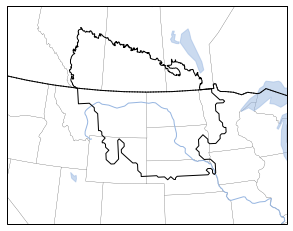

In [19]:
ax = plt.axes(projection = projection)
ax.set_extent([(-dx*e_we)/2,(dx*e_we)/2,(-dx*e_sn)/2,(dx*e_sn)/2], crs=projection)
#ax.add_patch(mpatches.Rectangle(xy=[1,1],width = e_we*100,height = e_sn*100,facecolor='red', alpha=0.2,transform=projection))
ax.coastlines()
#ax.add_feature(cfeature.NaturalEarthFeature)
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax.add_feature(states_provinces, edgecolor='black',linewidth=0.2)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_patch(mpatches.Rectangle(xy=[-6000*225,-6000*175], width=12000*225, height=12000*175,edgecolor='red',fill=False,transform=projection))
#ax.add_patch(mpatches.Rectangle(xy=[-290*20000,-200*20000], width = 290*20000, height = 200*20000, fill=False, edgecolor='black', transform=projection))
shape_feature = ShapelyFeature(Reader('/Users/gbromley/Dropbox/Montana_Climate_Project/Study_Area/NGP_Study_Area/Study_Area_08_01_17.shp').geometries(),crs=ccrs.PlateCarree(), facecolor='none',edgecolor='black')
ax.add_feature(shape_feature)
plt.show()

In [28]:
(200-140)*20000

1200000

In [16]:
from mpl_toolkits.basemap import Basemap
m = Basemap(width=225*12000,height=175*12000,projection='lcc',
            resolution='c',lat_1=40.,lat_2=55,lat_0=49,lon_0=-104.)
m.shadedrelief()

plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [ ]:
65,60 #corner start of 